## 说明

请按照填空顺序编号分别完成 参数优化，不同基函数的实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        return np.asarray(xs), np.asarray(ys)

## 不同的基函数 (basis function)的实现 填空顺序 2

请分别在这里实现“多项式基函数”以及“高斯基函数”

其中以及训练集的x的范围在0-25之间

In [2]:
def identity_basis(x):
    ret = np.expand_dims(x, axis=1)#吧x变成列向量
    return ret

def multinomial_basis(x, feature_num=3):
    '''多项式基函数'''
    #==========
    #todo '''请实现多项式基函数'''
    #==========
    ret = [[xi**i for i in range(1,feature_num+1)] for xi in x]
    ret = np.asarray(ret)
    return ret

def gaussian_basis(x, feature_num=10):
    '''高斯基函数'''
    #==========
    #todo '''请实现高斯基函数'''
    #==========
    wt = 2.5
    ret=[[np.exp(-0.5*((xi-i*wt)/wt)**2) for i in range(feature_num)] for xi in x]
    ret=np.asarray(ret)
    return ret

## 返回一个训练好的模型 填空顺序 1 用最小二乘法进行模型优化 
## 填空顺序 3 用梯度下降进行模型优化
> 先完成最小二乘法的优化 (参考书中第二章 2.3中的公式)

> 再完成梯度下降的优化   (参考书中第二章 2.3中的公式)

在main中利用训练集训练好模型的参数，并且返回一个训练好的模型。

计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w

In [3]:
def quadratic_loss(ys,ys_pred):
    loss=(ys_pred-ys)**2/2
    #print("loss shape is ",loss.shape)
    return loss

In [4]:
from tqdm.notebook import tqdm
def main(x_train, y_train):
    """
    训练模型，并返回从x到y的映射。
    
    """
    basis_func = gaussian_basis
    loss_func=quadratic_loss
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1)
    phi1 = basis_func(x_train)
    phi = np.concatenate([phi0, phi1], axis=1)

    #==========
    #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w'''
    #==========
    def df(phi,y,wt=0.001):
        y = np.expand_dims(y_train, axis=1)
        #print(np.dot(phi, w).shape,y.shape)
        y0_loss = loss_func(y,np.dot(phi, w))

        dw=np.zeros_like(phi)
        for j in range(len(w)):
            w1=w[:]
            w1[j]+=wt
            y1_loss=loss_func(y,np.dot(phi, w1))
            dw[:,j]= ((y1_loss-y0_loss)/wt)[:,0]

        dw=np.sum(dw,axis=0)/dw.shape[0]
        #print(np.mean(y0_loss))
        t.set_postfix(loss=np.mean(y0_loss))
        dw=np.expand_dims(dw, axis=1)
        return dw

    alfa=0.3
    w=np.ones((phi.shape[1],1))
    t=tqdm(range(200000))
    #print("w shape is ",w.shape)
    for i in t:
        #print("fine shape is",(alfa*df(x_train,y_train)).shape)
        w-=alfa*df(phi,y_train)
        
        #print(w.T)
        #print(w)
    #w=np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(y)

    #print(w)
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)
        return y
        

    return f

## 评估结果 
> 没有需要填写的代码，但是建议读懂

(300,)
(200,)



训练集预测值与真实值的标准差：10.0
预测值与真实值的标准差：10.1


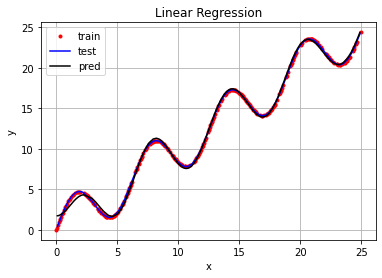

In [5]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train)

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
    plt.plot(x_test, y_test, 'b')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.grid(True)
    plt.show()